In [1]:
import tensorflow as tf
import numpy as np
import util
from timeit import default_timer as timer
from datetime import datetime
import pickle

In [2]:
XTrainTemp = util.readObject(path='pathXTrain')
YTrainTemp = util.readObject(path='pathYTrain')

XTestTemp = util.readObject(path='pathXTest')
YTestTemp = util.readObject(path='pathYTest')

XValidationTemp = util.readObject(path='pathXValidation')
YValidationTemp = util.readObject(path='pathYValidation')

In [3]:
xTrain, yTrain = util.consolidateInputsAndOutputs(XTrainTemp, YTrainTemp)
xTest, yTest = util.consolidateInputsAndOutputs(XTestTemp, YTestTemp)
xValidation, yValidation = util.consolidateInputsAndOutputs(XValidationTemp, YValidationTemp)

#xTest = np.append(xTest, xValidation)
#yTest = np.append(yTest, yValidation)
# integer encode
yTrain = util.integerEncoded(yTrain)
yTest = util.integerEncoded(yTest)
yValidation = util.integerEncoded(yValidation)

In [4]:
print(np.shape(xTrain))
print(np.shape(yTrain))

print(np.shape(xTest))
print(np.shape(yTest))

print(np.shape(xValidation))
print(np.shape(yValidation))

(50371, 28, 28)
(50371,)
(27053, 28, 28)
(27053,)
(4188, 28, 28)
(4188,)


In [5]:
xTrain = xTrain.reshape((-1,28,28,1))
xTest = xTest.reshape((-1,28,28,1))
xValidation = xValidation.reshape((-1,28,28,1))
xTrain.shape, yTrain.shape

((50371, 28, 28, 1), (50371,))

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPool2D, Dropout

Using TensorFlow backend.


In [7]:
with tf.device('/gpu:0'):
    model = Sequential()
    model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(Dropout(0.25))
    model.add(MaxPool2D())
    model.add(Dropout(0.25))
    model.add(Conv2D(32, 3, activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(MaxPool2D())
    model.add(Dropout(0.2))
    model.add(Conv2D(32, 3, activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(MaxPool2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
__________

In [8]:
with tf.device('/gpu:0'):
    hist = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=20, batch_size=2048)

Train on 50371 samples, validate on 27053 samples
Epoch 1/20
50371/50371 [==============================] - 16s - loss: 0.8335 - acc: 0.6237 - val_loss: 0.6255 - val_acc: 0.8917
Epoch 2/20
50371/50371 [==============================] - 8s - loss: 0.3388 - acc: 0.8963 - val_loss: 0.5995 - val_acc: 0.8628
Epoch 3/20
50371/50371 [==============================] - 8s - loss: 0.2730 - acc: 0.9154 - val_loss: 0.5075 - val_acc: 0.9217
Epoch 4/20
50371/50371 [==============================] - 8s - loss: 0.2283 - acc: 0.9321 - val_loss: 0.4103 - val_acc: 0.9470
Epoch 5/20
50371/50371 [==============================] - 8s - loss: 0.1936 - acc: 0.9407 - val_loss: 0.3471 - val_acc: 0.9545
Epoch 6/20
50371/50371 [==============================] - 8s - loss: 0.1733 - acc: 0.9447 - val_loss: 0.3178 - val_acc: 0.9550
Epoch 7/20
50371/50371 [==============================] - 8s - loss: 0.1610 - acc: 0.9471 - val_loss: 0.2858 - val_acc: 0.9568
Epoch 8/20
50371/50371 [==============================] - 8s

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.DataFrame(hist.history)
df.tail()

,acc,loss,val_acc,val_loss
15,0.962836,0.109131,0.963109,0.178140
16,0.963153,0.107530,0.962555,0.163759
17,0.964861,0.101824,0.964144,0.153665
18,0.965099,0.100692,0.963479,0.151308
19,0.965595,0.098762,0.962148,0.155400


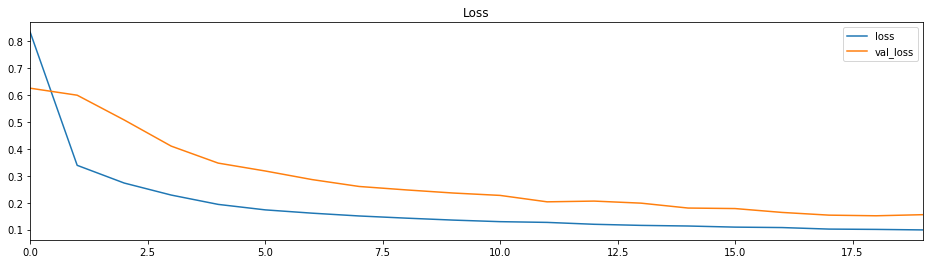

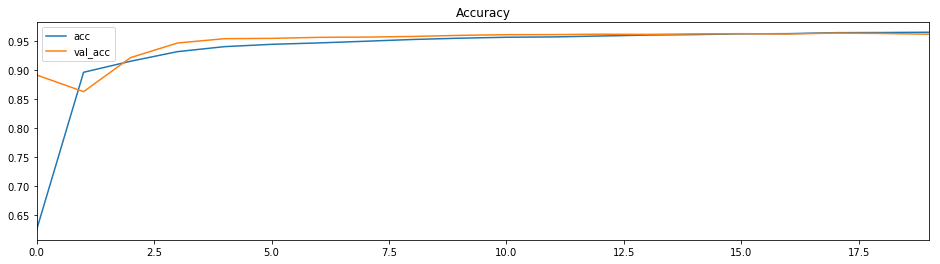

In [10]:
df.plot(y=['loss', 'val_loss'], figsize=(16,4), title='Loss')
df.plot(y=['acc', 'val_acc'], figsize=(16,4), title='Accuracy');

In [11]:
###saving model
##Saving weights and model
# serialize model to JSON
model_json = model.to_json()
with open("D:/fjam/Master Informatic PUCP/tesis/weightsAndModels/model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("D:/fjam/Master Informatic PUCP/tesis/weightsAndModels/model1.h5py")
print("Saved model to disk")

Saved model to disk


In [12]:
folderPageImages = 'parzivalDataset'; 
folderGroundThruth = 'groundTruth'
ximg_test, xgt_test = util.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'test', 2**-3)

In [13]:
ximg_test_superpixels       = util.readObject('pathSuperPixelesTest')

In [14]:
i = np.random.choice(len(ximg_test))
superpixels = ximg_test_superpixels[i]
img = ximg_test[i]
XTestToPred, XCentralPointsTest, listSuperPixelesProcessedTest = util.doInputs([img], [superpixels], 28, 'test')
YTestToPred = util.doLabels([XCentralPointsTest[0]], [xgt_test[i]], folderGroundThruth, 'test', 2**3)


In [18]:
print(i)
startTime = datetime.now()
visGT = np.zeros(img.shape[:3], dtype="uint8")
superpixels = listSuperPixelesProcessedTest[0]

for j in range(len(superpixels)) :
    if YTestToPred[0][j] == 'text' :    
        visGT[superpixels[j] == 255] = (0, 0, 255)
    elif YTestToPred[0][j] == 'decoration' :
        visGT[superpixels[j] == 255] = (255, 0, 0)
    elif YTestToPred[0][j] == 'comment' :
        visGT[superpixels[j] == 255] = (0, 255, 0)
    elif YTestToPred[0][j] == 'page' :
        visGT[superpixels[j] == 255] = (255, 255, 255)
    elif YTestToPred[0][j] == 'periphery' :
        visGT[superpixels[j] == 255] = (0, 0, 0)

5


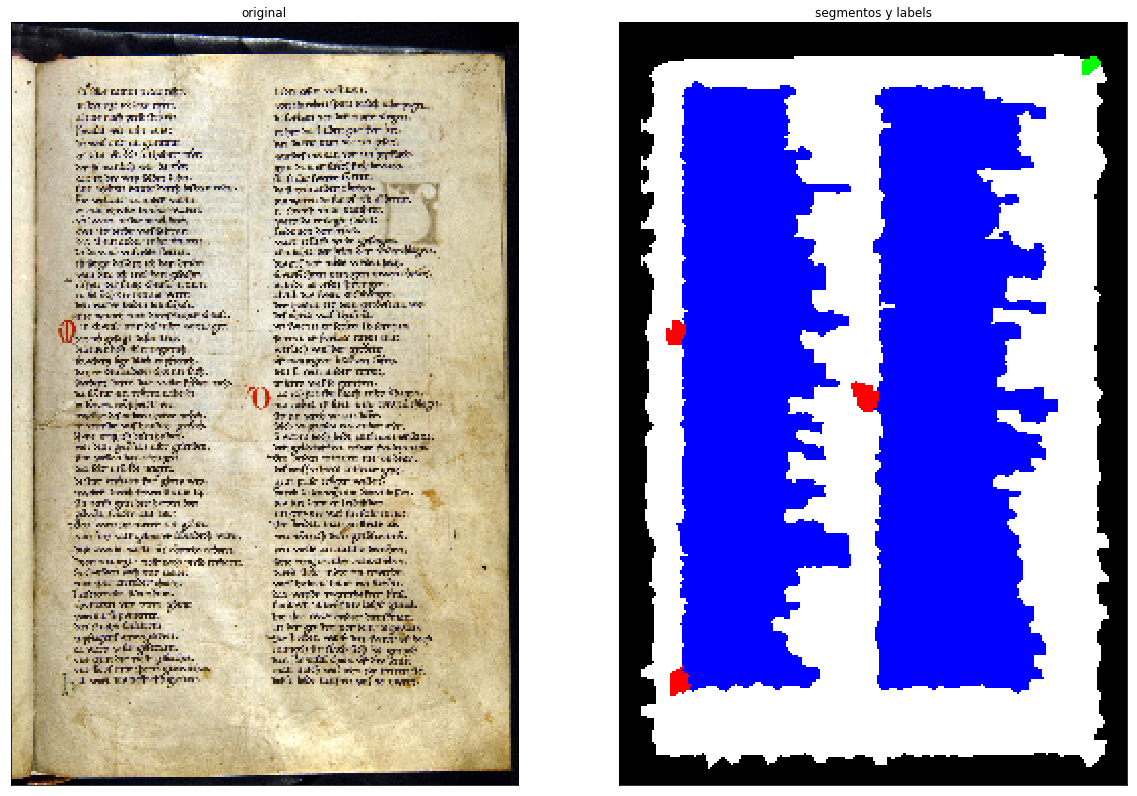

In [19]:
util.subplot(titles=['original','segmentos y labels'], images = [img, visGT], rows = 1, imgPerRows = 2, size = 20)


In [20]:
yPred = []
labels = []
for i in range(len(XTestToPred)) :
    labels = []
    for j in range(len(XTestToPred[i])) :
        predictedLabel = model.predict_classes(XTestToPred[i][j].reshape(1,28,28,1), verbose=0)[0]
        labels.append(predictedLabel)
    yPred.append(labels)

0:comment 1:decoration 2:page 3:periphery 4:text

In [21]:
startTime = datetime.now()
visPred = np.zeros(img.shape[:3], dtype="uint8")

for k in range(len(superpixels)) :
    if yPred[0][k] == 4 :    
        visPred[superpixels[k] == 255] = (0, 0, 255)
    elif yPred[0][k] == 1 :
        visPred[superpixels[k] == 255] = (255, 0, 0)
    elif yPred[0][k] == 0 :
        visPred[superpixels[k] == 255] = (0, 255, 0)
    elif yPred[0][k] == 2 :
        visPred[superpixels[k] == 255] = (255, 255, 255)
    elif yPred[0][k] == 3 :
        visPred[superpixels[k] == 255] = (0, 0, 0)

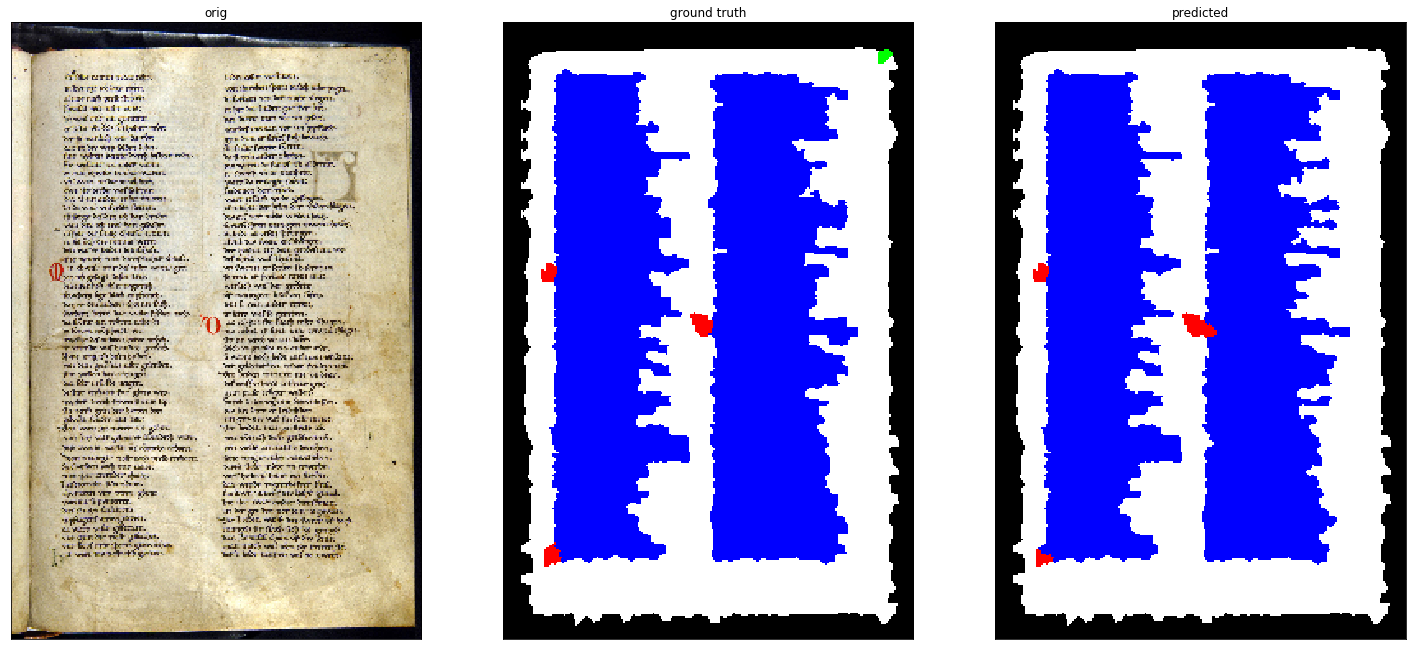

In [22]:
util.subplot(titles=['orig','ground truth', 'predicted'], imgPerRows=3, rows=1, size=25, images=[img, visGT, visPred])

In [23]:
with tf.device('/gpu:0'):
    model = Sequential()
    model.add(Conv2D(4, 3, activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
dropout_8 (Dropout)          (None, 28, 28, 4)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 505       
Total params: 314,245
Trainable params: 314,245
Non-trainable params: 0
_________________________________________________________________


In [24]:
with tf.device('/gpu:0'):
    hist = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=20, batch_size=2048)

Train on 50371 samples, validate on 27053 samples
Epoch 1/20
50371/50371 [==============================] - 3s - loss: 1.1468 - acc: 0.4814 - val_loss: 0.8038 - val_acc: 0.4818
Epoch 2/20
50371/50371 [==============================] - 2s - loss: 0.8620 - acc: 0.5112 - val_loss: 0.7815 - val_acc: 0.6310
Epoch 3/20
50371/50371 [==============================] - 2s - loss: 0.7966 - acc: 0.6084 - val_loss: 0.5605 - val_acc: 0.8827
Epoch 4/20
50371/50371 [==============================] - 2s - loss: 0.5826 - acc: 0.8070 - val_loss: 0.3871 - val_acc: 0.8934
Epoch 5/20
50371/50371 [==============================] - 2s - loss: 0.4755 - acc: 0.8546 - val_loss: 0.3157 - val_acc: 0.9070
Epoch 6/20
50371/50371 [==============================] - 2s - loss: 0.4156 - acc: 0.8771 - val_loss: 0.2768 - val_acc: 0.9153
Epoch 7/20
50371/50371 [==============================] - 2s - loss: 0.3717 - acc: 0.8912 - val_loss: 0.2516 - val_acc: 0.9217
Epoch 8/20
50371/50371 [==============================] - 2s 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(hist.history)
df.tail()

,acc,loss,val_acc,val_loss
15,0.930694,0.242448,0.950911,0.176590
16,0.930277,0.241277,0.952759,0.171828
17,0.932759,0.236462,0.953129,0.172496
18,0.933057,0.231296,0.953573,0.170099
19,0.934367,0.228705,0.953905,0.168733


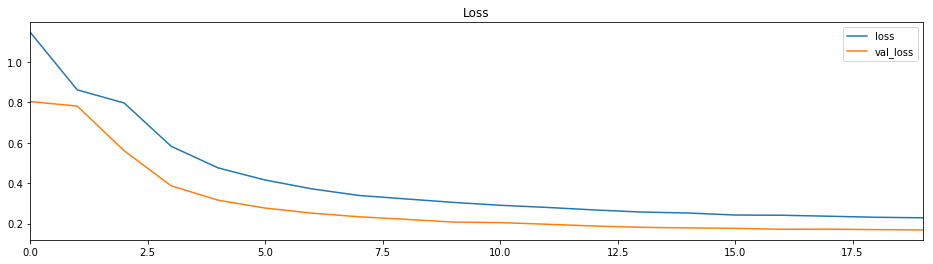

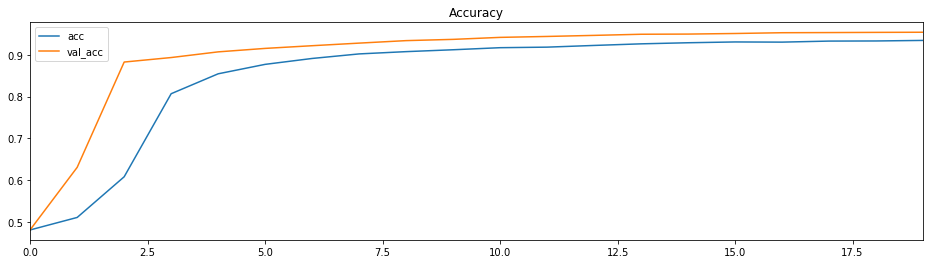

In [26]:
df.plot(y=['loss', 'val_loss'], figsize=(16,4), title='Loss')
df.plot(y=['acc', 'val_acc'], figsize=(16,4), title='Accuracy');

In [27]:
##Saving weights and model
# serialize model to JSON
model_json = model.to_json()
with open("D:/fjam/Master Informatic PUCP/tesis/weightsAndModels/model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("D:/fjam/Master Informatic PUCP/tesis/weightsAndModels/model2.h5py")
print("Saved model to disk")

Saved model to disk


0


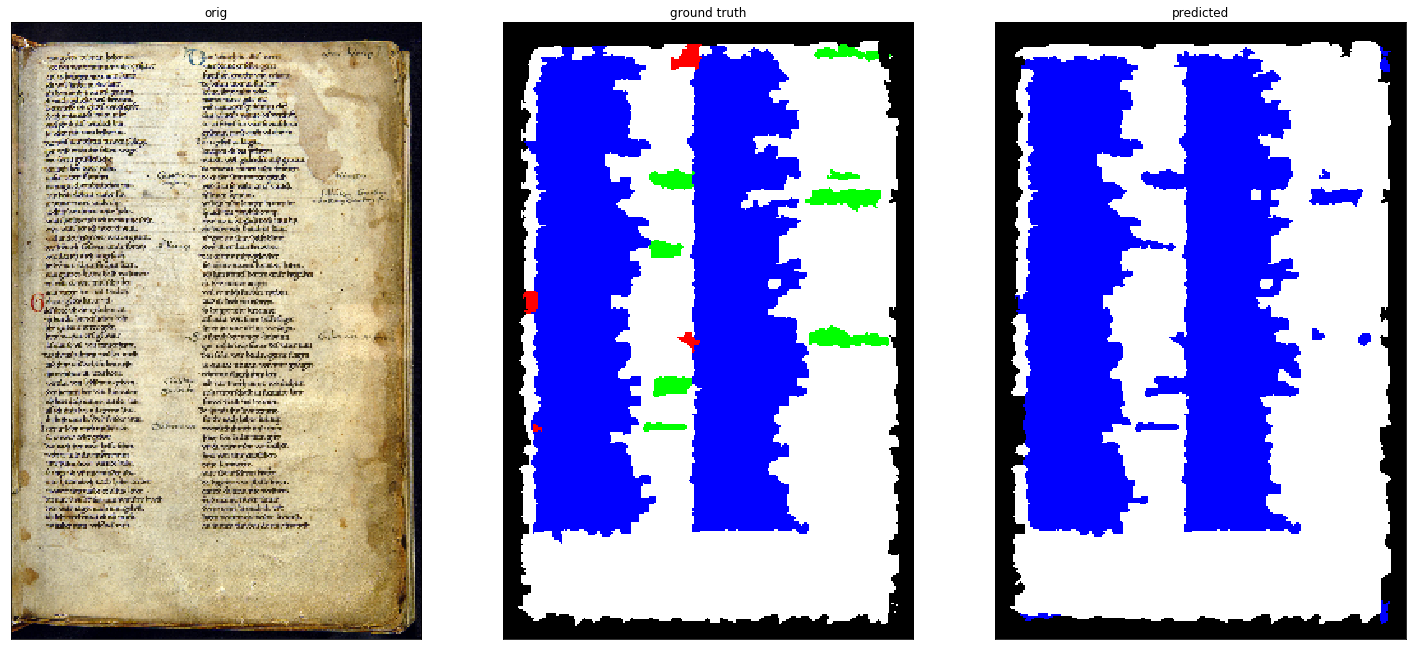

In [29]:
ximg_test_superpixels       = util.readObject('pathSuperPixelesTest')
superpixels = ximg_test_superpixels[i]
img = ximg_test[i]
XTestToPred, XCentralPointsTest, listSuperPixelesProcessedTest = util.doInputs([img], [superpixels], 28, 'test')
YTestToPred = util.doLabels([XCentralPointsTest[0]], [xgt_test[i]], folderGroundThruth, 'test', 2**3)
print(i)
startTime = datetime.now()
#isGT = np.zeros(img.shape[:2], dtype="float")
superpixels = listSuperPixelesProcessedTest[0]

yPred = []
labels = []
for i in range(len(XTestToPred)) :
    labels = []
    for j in range(len(XTestToPred[i])) :
        predictedLabel = model.predict_classes(XTestToPred[i][j].reshape(1,28,28,1), verbose=0)[0]
        labels.append(predictedLabel)
    yPred.append(labels)    
    
startTime = datetime.now()
visPred = np.zeros(img.shape[:3], dtype="uint8")

for j in range(len(superpixels)) :
    if YTestToPred[0][j] == 'text' :    
        visGT[superpixels[j] == 255] = (0, 0, 255)
    elif YTestToPred[0][j] == 'decoration' :
        visGT[superpixels[j] == 255] = (255, 0, 0)
    elif YTestToPred[0][j] == 'comment' :
        visGT[superpixels[j] == 255] = (0, 255, 0)
    elif YTestToPred[0][j] == 'page' :
        visGT[superpixels[j] == 255] = (255, 255, 255)
    elif YTestToPred[0][j] == 'periphery' :
        visGT[superpixels[j] == 255] = (0, 0, 0)

for k in range(len(superpixels)) :
    if yPred[0][k] == 4 :    
        visPred[superpixels[k] == 255] = (0, 0, 255)
    elif yPred[0][k] == 1 :
        visPred[superpixels[k] == 255] = (255, 0, 0)
    elif yPred[0][k] == 0 :
        visPred[superpixels[k] == 255] = (0, 255, 0)
    elif yPred[0][k] == 2 :
        visPred[superpixels[k] == 255] = (255, 255, 255)
    elif yPred[0][k] == 3 :
        visPred[superpixels[k] == 255] = (0, 0, 0)
        
util.subplot(titles=['orig','ground truth', 'predicted'], imgPerRows=3, rows=1, size=25, images=[img, visGT, visPred])        